In [1]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import sklearn.metrics as metrics

Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
boston = load_boston()
#보스턴 데이터셋 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(boston.data,boston.target, test_size = 0.3, random_state = 10)

In [5]:
epoch = 100
learning_rate = 0.05
gamma = 0
subsampling = 0.6
max_depth = 7
xgb_model = xgboost.XGBRegressor(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

(354, 13) (354,)
[12:17:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, subsampling=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

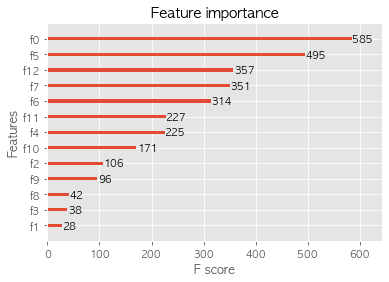

In [6]:
xgboost.plot_importance(xgb_model)

In [7]:
df = pd.read_csv('./child.csv')
df

,Unnamed: 0,Unnamed: 0.1,성별,생년월일,친권자 유형,가족 유형,다문화가족,가구 소득 구분코드,기초생활수급 유형,접수 유형,신고접수 구분,피해아동 상태 구분,행위자 아동 관계,아동 동거 여부,통계 거점,조사 완료 여부,아동 동거 여부.1,학대 혐의 여부
0,0,12,1,20061213.0,7,15,3,2,1,1,1,1,24,1,14,1,1,1
1,1,28,1,20090609.0,8,10,3,5,1,1,1,1,25,1,13,1,1,1
2,2,35,1,20151012.0,8,10,2,1,1,1,1,1,25,1,16,1,1,1
3,3,36,1,20120720.0,8,10,2,1,1,1,1,1,25,1,16,1,1,1
4,4,41,1,20171214.0,8,18,3,1,1,1,1,1,25,1,17,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,7962,112586,1,20071125.0,8,17,3,1,1,1,1,1,24,1,18,1,1,1
7963,7963,113168,1,19990802.0,7,16,3,3,0,1,1,1,24,0,15,1,0,1
7964,7964,114453,1,20050924.0,6,12,3,4,1,1,1,1,25,1,9,1,1,1
7965,7965,116636,1,20050924.0,6,12,3,4,1,1,1,1,22,1,9,1,1,1


In [8]:
df['생년월일'] = df['생년월일'].astype('str')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7967 entries, 0 to 7966
Data columns (total 18 columns):
Unnamed: 0      7967 non-null int64
Unnamed: 0.1    7967 non-null int64
성별              7967 non-null int64
생년월일            7967 non-null object
친권자 유형          7967 non-null int64
가족 유형           7967 non-null int64
다문화가족           7967 non-null int64
가구 소득 구분코드      7967 non-null int64
기초생활수급 유형       7967 non-null int64
접수 유형           7967 non-null int64
신고접수 구분         7967 non-null int64
피해아동 상태 구분      7967 non-null int64
행위자 아동 관계       7967 non-null int64
아동 동거 여부        7967 non-null int64
통계 거점           7967 non-null int64
조사 완료 여부        7967 non-null int64
아동 동거 여부.1      7967 non-null int64
학대 혐의 여부        7967 non-null int64
dtypes: int64(17), object(1)
memory usage: 1.1+ MB


In [10]:
b = []
for i in df['생년월일']:
    a = i[:4]
    a = int(a)
    b.append(2019 - a)

print(b)

[13, 10, 4, 7, 2, 5, 8, 8, 15, 9, 3, 9, 16, 4, 18, 18, 17, 8, 10, 10, 11, 18, 18, 4, 7, 5, 9, 8, 7, 6, 3, 3, 2, 2, 14, 15, 14, 4, 9, 13, 12, 7, 13, 10, 5, 7, 6, 7, 14, 1, 12, 10, 5, 11, 14, 9, 11, 15, 4, 7, 7, 1, 6, 6, 12, 11, 11, 6, 4, 6, 4, 18, 7, 13, 3, 3, 3, 10, 14, 15, 15, 8, 9, 7, 18, 2, 3, 11, 17, 17, 11, 9, 12, 11, 11, 12, 12, 12, 7, 13, 4, 17, 17, 10, 10, 8, 18, 18, 13, 15, 18, 8, 14, 14, 14, 13, 13, 4, 12, 8, 14, 7, 12, 12, 13, 13, 18, 9, 11, 9, 17, 2, 4, 8, 7, 8, 15, 8, 10, 10, 10, 8, 12, 16, 16, 12, 11, 11, 3, 3, 13, 15, 15, 11, 10, 8, 13, 6, 9, 8, 4, 8, 8, 4, 6, 4, 4, 6, 7, 7, 10, 6, 12, 14, 12, 15, 1, 3, 3, 1, 4, 2, 13, 15, 4, 14, 13, 18, 11, 12, 12, 9, 8, 18, 13, 9, 10, 10, 12, 17, 4, 10, 7, 9, 8, 9, 8, 8, 14, 10, 10, 14, 14, 13, 14, 10, 10, 10, 2, 8, 5, 13, 5, 13, 2, 2, 11, 12, 14, 14, 10, 13, 10, 3, 6, 3, 6, 8, 9, 9, 6, 17, 18, 10, 7, 4, 13, 14, 9, 7, 17, 9, 7, 12, 10, 8, 6, 3, 12, 10, 8, 6, 3, 17, 17, 18, 13, 14, 9, 10, 16, 13, 17, 16, 6, 1, 6, 16, 17, 16, 2, 15, 10, 

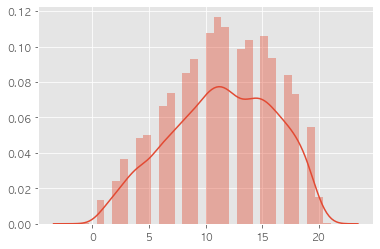

In [11]:
sns.distplot(b)

In [12]:
test=list(set(b))

In [13]:
test

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, -1]

In [14]:
c = []
for i in b:
    if i >= 0 and i <= 5:
        c.append(1)
    elif i > 5 and i <= 12:
        c.append(2)
    elif i > 12 and i <= 19:
        c.append(3)
    elif i >19 and i <= 25:
        c.append(1)

In [15]:
df = df.drop(['생년월일'], axis = 1)

In [16]:
c = pd.Series(c)

In [17]:
df = pd.concat([df,c],axis = 1)
df

,Unnamed: 0,Unnamed: 0.1,성별,친권자 유형,가족 유형,다문화가족,가구 소득 구분코드,기초생활수급 유형,접수 유형,신고접수 구분,피해아동 상태 구분,행위자 아동 관계,아동 동거 여부,통계 거점,조사 완료 여부,아동 동거 여부.1,학대 혐의 여부,0
0,0,12,1,7,15,3,2,1,1,1,1,24,1,14,1,1,1,3.0
1,1,28,1,8,10,3,5,1,1,1,1,25,1,13,1,1,1,2.0
2,2,35,1,8,10,2,1,1,1,1,1,25,1,16,1,1,1,1.0
3,3,36,1,8,10,2,1,1,1,1,1,25,1,16,1,1,1,2.0
4,4,41,1,8,18,3,1,1,1,1,1,25,1,17,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,7962,112586,1,8,17,3,1,1,1,1,1,24,1,18,1,1,1,1.0
7963,7963,113168,1,7,16,3,3,0,1,1,1,24,0,15,1,0,1,3.0
7964,7964,114453,1,6,12,3,4,1,1,1,1,25,1,9,1,1,1,3.0
7965,7965,116636,1,6,12,3,4,1,1,1,1,22,1,9,1,1,1,2.0


In [18]:
df.isnull().sum()
#null값이 존재하는데 2018년 접수인데 2020년생으로 되어있는 잘못된 자료임으로 삭제

Unnamed: 0      0
Unnamed: 0.1    0
성별              0
친권자 유형          0
가족 유형           0
다문화가족           0
가구 소득 구분코드      0
기초생활수급 유형       0
접수 유형           0
신고접수 구분         0
피해아동 상태 구분      0
행위자 아동 관계       0
아동 동거 여부        0
통계 거점           0
조사 완료 여부        0
아동 동거 여부.1      0
학대 혐의 여부        0
0               1
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
성별              0
친권자 유형          0
가족 유형           0
다문화가족           0
가구 소득 구분코드      0
기초생활수급 유형       0
접수 유형           0
신고접수 구분         0
피해아동 상태 구분      0
행위자 아동 관계       0
아동 동거 여부        0
통계 거점           0
조사 완료 여부        0
아동 동거 여부.1      0
학대 혐의 여부        0
0               0
dtype: int64

In [21]:
df.columns

Index([  'Unnamed: 0', 'Unnamed: 0.1',           '성별',       '친권자 유형',
              '가족 유형',        '다문화가족',   '가구 소득 구분코드',    '기초생활수급 유형',
              '접수 유형',      '신고접수 구분',   '피해아동 상태 구분',    '행위자 아동 관계',
           '아동 동거 여부',        '통계 거점',     '조사 완료 여부',   '아동 동거 여부.1',
           '학대 혐의 여부',              0],
      dtype='object')

In [22]:
df.rename(columns = {0 : '생년월일'}, inplace = True)
#df.rename : 컬럼 이름 변경

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [23]:
df

,Unnamed: 0,Unnamed: 0.1,성별,친권자 유형,가족 유형,다문화가족,가구 소득 구분코드,기초생활수급 유형,접수 유형,신고접수 구분,피해아동 상태 구분,행위자 아동 관계,아동 동거 여부,통계 거점,조사 완료 여부,아동 동거 여부.1,학대 혐의 여부,생년월일
0,0,12,1,7,15,3,2,1,1,1,1,24,1,14,1,1,1,3.0
1,1,28,1,8,10,3,5,1,1,1,1,25,1,13,1,1,1,2.0
2,2,35,1,8,10,2,1,1,1,1,1,25,1,16,1,1,1,1.0
3,3,36,1,8,10,2,1,1,1,1,1,25,1,16,1,1,1,2.0
4,4,41,1,8,18,3,1,1,1,1,1,25,1,17,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,7961,108124,1,6,15,3,5,1,1,1,1,22,1,18,1,1,0,2.0
7962,7962,112586,1,8,17,3,1,1,1,1,1,24,1,18,1,1,1,1.0
7963,7963,113168,1,7,16,3,3,0,1,1,1,24,0,15,1,0,1,3.0
7964,7964,114453,1,6,12,3,4,1,1,1,1,25,1,9,1,1,1,3.0


In [24]:
for i in df.columns:
    print(i, ':', df[i].unique())

Unnamed: 0 : [   0    1    2 ... 7963 7964 7965]
Unnamed: 0.1 : [    12     28     35 ... 113168 114453 116636]
성별 : [1]
친권자 유형 : [7 8 6 5 2 1 4 3]
가족 유형 : [15 10 18 17 11  9  6  8 14 16  7 13 12  2  4  5  1  3]
다문화가족 : [3 2 1]
가구 소득 구분코드 : [2 5 1 7 4 3 6]
기초생활수급 유형 : [1 0]
접수 유형 : [1 0]
신고접수 구분 : [1 0]
피해아동 상태 구분 : [1 0]
행위자 아동 관계 : [24 25 18 20 15 12 21 19 23 17 16 13 22 10  8  5  2 14  4  3 11  7  9  6
  1]
아동 동거 여부 : [1 0]
통계 거점 : [14 13 16 17 15 18 12 11  8  7  9  5 10  6  3  4  2  1]
조사 완료 여부 : [1 0]
아동 동거 여부.1 : [1 0]
학대 혐의 여부 : [1 0]
생년월일 : [3. 2. 1.]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7966 entries, 0 to 7965
Data columns (total 18 columns):
Unnamed: 0      7966 non-null int64
Unnamed: 0.1    7966 non-null int64
성별              7966 non-null int64
친권자 유형          7966 non-null int64
가족 유형           7966 non-null int64
다문화가족           7966 non-null int64
가구 소득 구분코드      7966 non-null int64
기초생활수급 유형       7966 non-null int64
접수 유형           7966 non-null int64
신고접수 구분         7966 non-null int64
피해아동 상태 구분      7966 non-null int64
행위자 아동 관계       7966 non-null int64
아동 동거 여부        7966 non-null int64
통계 거점           7966 non-null int64
조사 완료 여부        7966 non-null int64
아동 동거 여부.1      7966 non-null int64
학대 혐의 여부        7966 non-null int64
생년월일            7966 non-null float64
dtypes: float64(1), int64(17)
memory usage: 1.2 MB


In [26]:
y = df['학대 혐의 여부']
X = df.drop(['학대 혐의 여부','Unnamed: 0','Unnamed: 0.1'], axis = 1)

In [27]:
print(X.shape)
print(y.shape)
#깔끔

(7966, 15)
(7966,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [29]:
print(X_train.shape)
print(y_train.shape)

(5576, 15)
(5576,)


### Decision Tree

In [30]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [31]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
from sklearn import tree
Child_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10, max_features= 3)
Child_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [33]:
from sklearn.metrics import accuracy_score

y_pred_tr = Child_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.87


### XGBOOST

In [34]:
epoch = 100
learning_rate = 0.05
gamma = 0
subsampling = 0.6
max_depth = 7
xgb_model = xgboost.XGBRegressor(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

(5576, 15) (5576,)
[12:17:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, subsampling=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

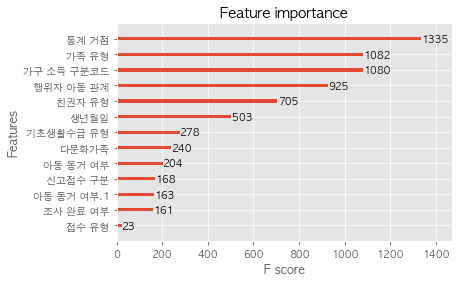

In [35]:
xgboost.plot_importance(xgb_model)

In [36]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [37]:
params = {'max_depth' : 4,
         'eta' : 0.005, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 ,
         'sub_sample' : 0.3,
         'min_child_weight' : 5,
         'num_boost_around' : 10}

num_rounds = 1000

In [38]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[12:17:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { early_stoppings, num_boost_around, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69046	eval-logloss:0.69039
[1]	train-logloss:0.68781	eval-logloss:0.68766
[2]	train-logloss:0.68518	eval-logloss:0.68495
[3]	train-logloss:0.68258	eval-logloss:0.68227
[4]	train-logloss:0.67999	eval-logloss:0.67962
[5]	train-logloss:0.67744	eval-logloss:0.67699
[6]	train-logloss:0.67492	eval-logloss:0.67439
[7]	train-logloss:0.67241	eval-logloss:0.67181
[8]	train-logloss:0.66993	eval-logloss:0.66926
[9]	train-logloss:0.66748	eval-logloss:0.66673
[10]	train-logloss:0.66505	eval-logloss:0.66423
[11]	train-logloss:0.66265	eval-logloss:0.66174
[12]	train-logloss:0.66027	eval-logloss

[162]	train-logloss:0.46351	eval-logloss:0.45458
[163]	train-logloss:0.46286	eval-logloss:0.45388
[164]	train-logloss:0.46220	eval-logloss:0.45320
[165]	train-logloss:0.46154	eval-logloss:0.45252
[166]	train-logloss:0.46090	eval-logloss:0.45183
[167]	train-logloss:0.46026	eval-logloss:0.45116
[168]	train-logloss:0.45962	eval-logloss:0.45049
[169]	train-logloss:0.45899	eval-logloss:0.44983
[170]	train-logloss:0.45837	eval-logloss:0.44917
[171]	train-logloss:0.45774	eval-logloss:0.44852
[172]	train-logloss:0.45713	eval-logloss:0.44787
[173]	train-logloss:0.45652	eval-logloss:0.44723
[174]	train-logloss:0.45591	eval-logloss:0.44659
[175]	train-logloss:0.45530	eval-logloss:0.44595
[176]	train-logloss:0.45471	eval-logloss:0.44532
[177]	train-logloss:0.45413	eval-logloss:0.44470
[178]	train-logloss:0.45354	eval-logloss:0.44408
[179]	train-logloss:0.45295	eval-logloss:0.44347
[180]	train-logloss:0.45237	eval-logloss:0.44286
[181]	train-logloss:0.45179	eval-logloss:0.44225
[182]	train-logloss:

[330]	train-logloss:0.40023	eval-logloss:0.38804
[331]	train-logloss:0.40004	eval-logloss:0.38785
[332]	train-logloss:0.39986	eval-logloss:0.38765
[333]	train-logloss:0.39966	eval-logloss:0.38745
[334]	train-logloss:0.39948	eval-logloss:0.38725
[335]	train-logloss:0.39929	eval-logloss:0.38705
[336]	train-logloss:0.39911	eval-logloss:0.38686
[337]	train-logloss:0.39892	eval-logloss:0.38666
[338]	train-logloss:0.39875	eval-logloss:0.38647
[339]	train-logloss:0.39856	eval-logloss:0.38627
[340]	train-logloss:0.39839	eval-logloss:0.38609
[341]	train-logloss:0.39820	eval-logloss:0.38589
[342]	train-logloss:0.39803	eval-logloss:0.38571
[343]	train-logloss:0.39786	eval-logloss:0.38553
[344]	train-logloss:0.39769	eval-logloss:0.38534
[345]	train-logloss:0.39751	eval-logloss:0.38515
[346]	train-logloss:0.39734	eval-logloss:0.38497
[347]	train-logloss:0.39717	eval-logloss:0.38479
[348]	train-logloss:0.39700	eval-logloss:0.38461
[349]	train-logloss:0.39683	eval-logloss:0.38443
[350]	train-logloss:

[498]	train-logloss:0.37993	eval-logloss:0.36792
[499]	train-logloss:0.37986	eval-logloss:0.36784
[500]	train-logloss:0.37979	eval-logloss:0.36778
[501]	train-logloss:0.37974	eval-logloss:0.36772
[502]	train-logloss:0.37966	eval-logloss:0.36764
[503]	train-logloss:0.37959	eval-logloss:0.36756
[504]	train-logloss:0.37952	eval-logloss:0.36751
[505]	train-logloss:0.37945	eval-logloss:0.36743
[506]	train-logloss:0.37939	eval-logloss:0.36737
[507]	train-logloss:0.37933	eval-logloss:0.36732
[508]	train-logloss:0.37926	eval-logloss:0.36724
[509]	train-logloss:0.37921	eval-logloss:0.36719
[510]	train-logloss:0.37913	eval-logloss:0.36711
[511]	train-logloss:0.37906	eval-logloss:0.36704
[512]	train-logloss:0.37900	eval-logloss:0.36698
[513]	train-logloss:0.37893	eval-logloss:0.36690
[514]	train-logloss:0.37886	eval-logloss:0.36684
[515]	train-logloss:0.37881	eval-logloss:0.36679
[516]	train-logloss:0.37874	eval-logloss:0.36671
[517]	train-logloss:0.37868	eval-logloss:0.36666
[518]	train-logloss:

[666]	train-logloss:0.37189	eval-logloss:0.36084
[667]	train-logloss:0.37186	eval-logloss:0.36082
[668]	train-logloss:0.37184	eval-logloss:0.36079
[669]	train-logloss:0.37181	eval-logloss:0.36076
[670]	train-logloss:0.37177	eval-logloss:0.36075
[671]	train-logloss:0.37174	eval-logloss:0.36073
[672]	train-logloss:0.37171	eval-logloss:0.36069
[673]	train-logloss:0.37168	eval-logloss:0.36067
[674]	train-logloss:0.37165	eval-logloss:0.36066
[675]	train-logloss:0.37162	eval-logloss:0.36064
[676]	train-logloss:0.37160	eval-logloss:0.36061
[677]	train-logloss:0.37157	eval-logloss:0.36058
[678]	train-logloss:0.37153	eval-logloss:0.36057
[679]	train-logloss:0.37150	eval-logloss:0.36055
[680]	train-logloss:0.37147	eval-logloss:0.36053
[681]	train-logloss:0.37144	eval-logloss:0.36051
[682]	train-logloss:0.37141	eval-logloss:0.36049
[683]	train-logloss:0.37138	eval-logloss:0.36048
[684]	train-logloss:0.37135	eval-logloss:0.36046
[685]	train-logloss:0.37132	eval-logloss:0.36045
[686]	train-logloss:

[834]	train-logloss:0.36739	eval-logloss:0.35850
[835]	train-logloss:0.36736	eval-logloss:0.35849
[836]	train-logloss:0.36735	eval-logloss:0.35849
[837]	train-logloss:0.36732	eval-logloss:0.35849
[838]	train-logloss:0.36730	eval-logloss:0.35848
[839]	train-logloss:0.36728	eval-logloss:0.35846
[840]	train-logloss:0.36726	eval-logloss:0.35844
[841]	train-logloss:0.36723	eval-logloss:0.35842
[842]	train-logloss:0.36721	eval-logloss:0.35841
[843]	train-logloss:0.36719	eval-logloss:0.35840
[844]	train-logloss:0.36716	eval-logloss:0.35838
[845]	train-logloss:0.36712	eval-logloss:0.35836
[846]	train-logloss:0.36709	eval-logloss:0.35834
[847]	train-logloss:0.36707	eval-logloss:0.35834
[848]	train-logloss:0.36705	eval-logloss:0.35833
[849]	train-logloss:0.36702	eval-logloss:0.35831
[850]	train-logloss:0.36700	eval-logloss:0.35830
[851]	train-logloss:0.36698	eval-logloss:0.35829
[852]	train-logloss:0.36696	eval-logloss:0.35828
[853]	train-logloss:0.36693	eval-logloss:0.35825
[854]	train-logloss:

In [39]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.889 0.86  0.872 0.871 0.903 0.86  0.726 0.729 0.736 0.897]
예측값 10개만 표시:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [40]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [41]:
get_clf_eval(y_test, preds)

오차행렬:
 [[  25  285]
 [  11 2069]]

정확도: 0.8762
정밀도: 0.8789
재현율: 0.9947
F1: 0.9332
AUC: 0.5377


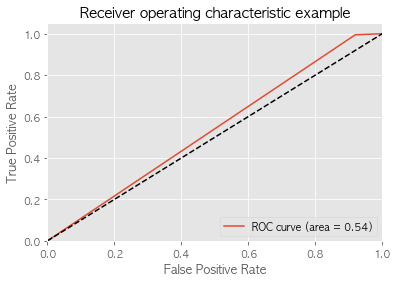

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [43]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,
                                max_depth = 5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.856
테스트 세트 정확도 : 0.872


In [45]:
pred_probs = forest.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[1 1 1 1 1 1 1 1 1 1]
예측값 10개만 표시:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [46]:
get_clf_eval(y_test, preds)

오차행렬:
 [[   5  305]
 [   0 2080]]

정확도: 0.8724
정밀도: 0.8721
재현율: 1.0000
F1: 0.9317
AUC: 0.5081


In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

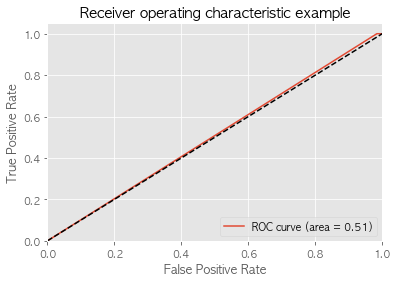

In [48]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [49]:
def plot_feature_importances_child(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


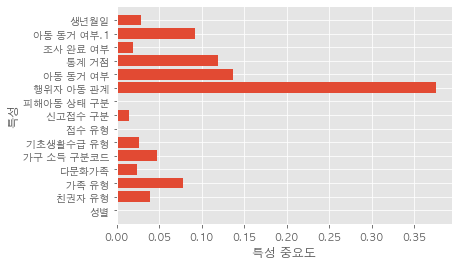

In [50]:
plot_feature_importances_child(forest)

### ANN

In [100]:
import tensorflow as tf
from tensorflow import keras

In [101]:
tf.__version__

'2.0.1'

In [102]:
model = Sequential()

In [103]:
model = Sequential([
    Dense(256, input_shape=(15,)),
    Activation('relu'),
    Dropout(0.4),
    Dense(32),
    Activation('relu'),
    Dropout(0.2),
    Dense(1),
    Activation('sigmoid')
])

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               4096      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                8224      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [105]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [106]:
epoch = 100
batch = 64
validation_split = 0.2
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 40, verbose = 1)

In [107]:
history = model.fit(X_train, y_train, 
          epochs = epoch, 
          batch_size = batch, 
          validation_split = validation_split,
          callbacks = [earlystopper] )

Train on 4460 samples, validate on 1116 samples
Epoch 1/100
4460/4460 [==============================] - 0s 86us/step - loss: 0.4959 - accuracy: 0.8278 - val_loss: 0.4044 - val_accuracy: 0.8566
Epoch 2/100
4460/4460 [==============================] - 0s 35us/step - loss: 0.4397 - accuracy: 0.8498 - val_loss: 0.4003 - val_accuracy: 0.8566
Epoch 3/100
4460/4460 [==============================] - 0s 29us/step - loss: 0.4276 - accuracy: 0.8516 - val_loss: 0.3997 - val_accuracy: 0.8566
Epoch 4/100
4460/4460 [==============================] - 0s 25us/step - loss: 0.4310 - accuracy: 0.8518 - val_loss: 0.3991 - val_accuracy: 0.8566
Epoch 5/100
4460/4460 [==============================] - 0s 25us/step - loss: 0.4242 - accuracy: 0.8518 - val_loss: 0.3980 - val_accuracy: 0.8566
Epoch 6/100
4460/4460 [==============================] - 0s 28us/step - loss: 0.4273 - accuracy: 0.8518 - val_loss: 0.3988 - val_accuracy: 0.8566
Epoch 7/100
4460/4460 [==============================] - 0s 33us/step - loss

4460/4460 [==============================] - 0s 37us/step - loss: 0.4048 - accuracy: 0.8516 - val_loss: 0.3988 - val_accuracy: 0.8566
Epoch 57/100
4460/4460 [==============================] - 0s 31us/step - loss: 0.4038 - accuracy: 0.8520 - val_loss: 0.3999 - val_accuracy: 0.8566
Epoch 58/100
4460/4460 [==============================] - 0s 24us/step - loss: 0.4059 - accuracy: 0.8525 - val_loss: 0.4014 - val_accuracy: 0.8566
Epoch 59/100
4460/4460 [==============================] - 0s 24us/step - loss: 0.4085 - accuracy: 0.8518 - val_loss: 0.4006 - val_accuracy: 0.8566
Epoch 60/100
4460/4460 [==============================] - 0s 24us/step - loss: 0.4040 - accuracy: 0.8522 - val_loss: 0.4016 - val_accuracy: 0.8566
Epoch 00060: early stopping


In [108]:
score, acc =model.evaluate(X_test, y_test, batch_size = batch)

2390/2390 [==============================] - 0s 11us/step


In [109]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.37735327689218723
Test Accuracy: 0.8702929019927979


In [110]:
pred_probs = model.predict(X_test)

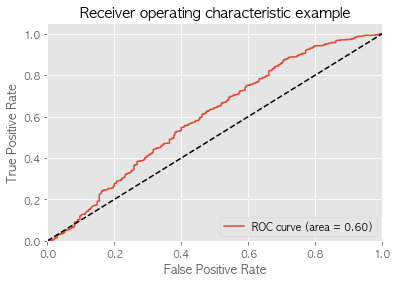

In [111]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_probs, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

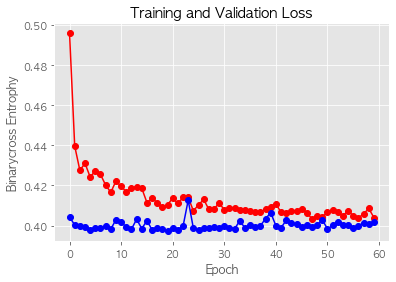

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Binarycross Entrophy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

#overfitting이 되고 있다.